In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from astropy.table import Table

In [3]:
apogee = Table.read('/data/jls/GaiaDR2/spectro/APOGEE_distances_withPRIOR_MASTER.hdf5')
apogee_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/APOGEE_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(apogee['flag']==0.), 'out of', len(apogee)
rave = Table.read('/data/jls/GaiaDR2/spectro/RAVE_DR5_distances_withPRIOR_MASTER.hdf5')
rave_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/RAVE_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(rave['flag']==0.), 'out of', len(rave)
ges = Table.read('/data/jls/GaiaDR2/spectro/GES_DR3_distances_withPRIOR_MASTER.hdf5')
ges_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/GES_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(ges['flag']==0.), 'out of', len(ges)
galah = Table.read('/data/jls/GaiaDR2/spectro/GALAH_distances_withPRIOR_MASTER.hdf5')
galah_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/GALAH_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(galah['flag']==0.), 'out of', len(galah)
lamost = Table.read('/data/jls/GaiaDR2/spectro/LAMOST_distances_withPRIOR_MASTER.hdf5')
lamost_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/LAMOST_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(lamost['flag']==0.), 'out of', len(lamost)
raveON = Table.read('/data/jls/GaiaDR2/spectro/RAVE_Cannon_distances_withPRIOR_MASTER.hdf5')
raveON_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/RAVEON_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(raveON['flag']==0.), 'out of', len(raveON)

/home/jls/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Processed: 203097 out of 258475
Processed: 413617 out of 457555
Processed: 10825 out of 25332
Processed: 260176 out of 342682
Processed: 2748393 out of 3177995
Processed: 375528 out of 457555


In [373]:
joint = pd.concat([ges.to_pandas(),raveON.to_pandas(),
                   galah.to_pandas(),apogee.to_pandas(),
                   lamost.to_pandas()],axis=0)

jointinputs = pd.concat([ges_inputs,raveON_inputs,
                   galah_inputs,apogee_inputs,
                   lamost_inputs],axis=0)

joint_table = Table.read('/data/jls/GaiaDR2/spectro/distances_withPRIOR_MASTER.hdf5')
joint_table['age']=np.power(10.,joint_table['log10_age'])
joint['age']=np.power(10.,joint['log10_age'])

In [374]:
joint_table.meta['COMMENT']

In [16]:
print len(joint_table), len(joint)
print np.count_nonzero(joint_table['flag']==0)
print np.count_nonzero((joint_table['duplicated']==0)&(joint_table['flag']==0)&(joint_table['source_id']==joint_table['source_id']))
print np.count_nonzero((joint_table['R_err']==joint_table['R_err'])&(joint_table['duplicated']==0)&(joint_table['flag']==0)&(joint_table['source_id']==joint_table['source_id']))

print np.count_nonzero(joint_table['best']==1)

4719594 4262039
4011636
3014394
2947430
3014394


In [18]:
surveys = ['Survey','RAVE','RAVEON','GALAH','APOGEE','LAMOST','GES','All','All no dupl.']
total_processed = ['Total', len(rave), len(raveON), len(galah), len(apogee), len(lamost), 
                   len(ges), len(joint_table), np.count_nonzero(joint_table['duplicated']==0)]
matches = ['Gaia matches',np.count_nonzero(rave['source_id']>0.), 
           np.count_nonzero(raveON['source_id']>0.), 
           np.count_nonzero(galah['source_id']>0.), 
           np.count_nonzero(apogee['source_id']>0.), 
           np.count_nonzero(lamost['source_id']>0.), 
           np.count_nonzero(ges['source_id']>0.), 
           np.count_nonzero(joint_table['source_id']>0.), np.count_nonzero(joint_table['duplicated']==0)]
successes = ['Success',np.count_nonzero(rave['flag']==0), 
           np.count_nonzero(raveON['flag']==0), 
           np.count_nonzero(galah['flag']==0), 
           np.count_nonzero(apogee['flag']==0), 
           np.count_nonzero(lamost['flag']==0), 
           np.count_nonzero(ges['flag']==0),
            np.count_nonzero(joint_table['flag']==0), 
             np.count_nonzero((joint_table['duplicated']==0)&(joint_table['flag']==0))]
successesG = ['Success with Gaia',np.count_nonzero((rave['flag']==0)&(rave['source_id']>0)), 
           np.count_nonzero((raveON['flag']==0)&(raveON['source_id']>0)), 
           np.count_nonzero((galah['flag']==0)&(galah['source_id']>0)), 
           np.count_nonzero((apogee['flag']==0)&(apogee['source_id']>0)), 
           np.count_nonzero((lamost['flag']==0)&(lamost['source_id']>0)), 
           np.count_nonzero((ges['flag']==0)&(ges['source_id']>0)), 
           np.count_nonzero((joint_table['flag']==0)&(joint_table['source_id']>0)), 
             np.count_nonzero((joint_table['duplicated']==0)&(joint_table['flag']==0))]
import tabulate
tab = tabulate.tabulate([surveys, total_processed, matches, successes, successesG],tablefmt='latex')
with open('table.dat', 'w') as f:
    f.write(tab)

In [19]:
!more table.dat

\begin{tabular}{lllllllll}
\hline
 Survey            & RAVE   & RAVEON & GALAH  & APOGEE & LAMOST  & GES   & All  
   & All no dupl. \\
 Total             & 457555 & 457555 & 342682 & 258475 & 3177995 & 25332 & 47195
94 & 3538518      \\
 Gaia matches      & 456353 & 456353 & 342212 & 256851 & 3168545 & 25313 & 47056
27 & 3538518      \\
 Success           & 413617 & 375528 & 260176 & 203097 & 2748393 & 10825 & 40116
36 & 3019680      \\
 Success with Gaia & 412655 & 374700 & 259820 & 202810 & 2745541 & 10824 & 40063
50 & 3019680      \\
\hline
\end{tabular}


### Binary stars

In [32]:
g = np.genfromtxt('/data/jls/isochrones/PARSEC_Gaia/grid/gaia_0.003.dat')
!head -15 /data/jls/isochrones/PARSEC_Gaia/grid/gaia_0.003.dat

# File generated by CMD 3.0 (http://stev.oapd.inaf.it/cmd) on Mon Mar 19 16:49:29 CET 2018
# PARSEC isochrones, release v1.2S
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287
# Warning: you choose not to include the TP-AGB phase!
# Photometric system: Gaia's DR2 G, G_BP and G_RP (Vegamags)
# Using NBC version of bolometric corrections as in Chen et al. (2014), MNRAS, 444, 2525
# BCs of Carbon stars derive from Aringer et al. (2009, A&A 503, 913)
# O-rich circumstellar dpmod60alox40 dust from Groenewegen (2006)
# C-rich circumstellar AMCSIC15 dust from Groenewegen (2006)
# IMF: Chabrier (2001) lognormal 
# On RGB, assumed Reimers mass loss with efficiency eta=0.2
# Kind of output: isochrone tables
#	Isochrone  Z = 0.01479	Y = 0.27470	[M/H] = 0.003	eta_R = 0.200	Age = 	3.9811e+06 yr
#      Z	log(age/yr)	M_ini   	M_act	logL/Lo	logTe	logG	mbol    G       G_BP    G_RP	int_IMF	sta

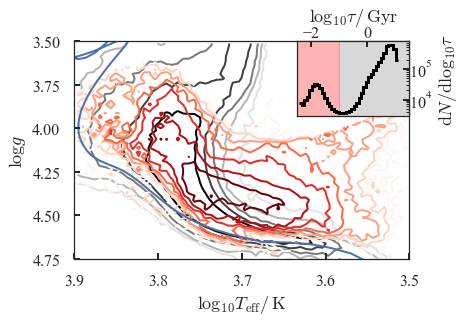

In [34]:
from matplotlib.colors import LogNorm
H=plt.hist2d(joint['log10_teff'][(joint['flag']==0)],
           joint['logg'][(joint['flag']==0)],
           bins=60,range=[[3.5,3.9],[3.5,5.]],
           norm=LogNorm(),
            );
H2=plt.hist2d(joint['log10_teff'][(joint['flag']==7)],
           joint['logg'][(joint['flag']==7)],
           bins=60,range=[[3.5,3.9],[3.5,5.]],
           norm=LogNorm(),
           cmap=plt.cm.viridis
          );
plt.clf()
plt.contour(.5*(H[1][1:]+H[1][:-1]),.5*(H[2][1:]+H[2][:-1]),np.log10(H[0]).T)
plt.contour(.5*(H2[1][1:]+H2[1][:-1]),.5*(H2[2][1:]+H2[2][:-1]),np.log10(H2[0]).T,cmap=plt.cm.Reds)
plt.xlim(3.9,3.5)
plt.ylim(4.75,3.5)
plt.xlabel(r'$\log_{10}T_\mathrm{eff}/\,\mathrm{K}$')
plt.ylabel(r'$\log g$')
plt.plot(g.T[5][g.T[1]==9.],g.T[6][g.T[1]==9.])
plt.axes([0.64,0.62,0.26,0.26])
plt.axvspan(-3,-1, alpha=0.3, color='red')
plt.axvspan(-1,2, alpha=0.3, color='gray')
plt.xlim(-2.5,1.5)

plt.hist(joint['log10_age'][(joint['flag']==0)|(joint['flag']==7)],histtype='step',lw=3,bins=40,color='k');
plt.xlabel(r'$\log_{10}\tau/\,\mathrm{Gyr}$')
plt.ylabel(r'$\mathrm{d}N/\mathrm{d}\log_{10}\tau$')
plt.gca().xaxis.tick_top()
plt.gca().yaxis.tick_right()
plt.gca().xaxis.set_label_position('top') 
plt.gca().yaxis.set_label_position('right') 
plt.gca().tick_params(axis='both', which='major', pad=0)
plt.semilogy()
plt.savefig('age_binary.pdf', bbox_inches='tight')

### Input/Output teff,logg,Z

In [34]:
def input_output(inputs, data, a, title):
    fltr = data['flag']==0
    fltr &= data['log10_age']>-1.
    plt.sca(a[0])
    plt.scatter(np.log10(inputs['teff'][fltr]),inputs['logg'][fltr],
                c=inputs['fe_h'][fltr],s=1,cmap=plt.cm.viridis, alpha=0.2, vmin=-2., vmax=0.5);
    plt.xlabel(r'$\log_{10}T_\mathrm{eff}$')
    plt.ylabel(r'$\log g$')
    plt.annotate(title,xy=(0.05,0.95),ha='left',va='top',xycoords='axes fraction',fontsize=16)
    plt.colorbar(label='[M/H]')
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xlim(4.,3.4)
    plt.ylim(5.5,-0.5)
    plt.sca(a[1])
    plt.scatter(data['log10_teff'][fltr],data['logg'][fltr],c=data['Z'][fltr],s=1,
                cmap=plt.cm.viridis, alpha=0.2, vmin=-2., vmax=0.5);
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xlabel(r'$\log_{10}T_\mathrm{eff}$')
    plt.ylabel(r'$\log g$')
    plt.colorbar(label='[M/H]')
    plt.xlim(4.,3.4)
    plt.ylim(5.5,-0.5)
    plt.tight_layout()

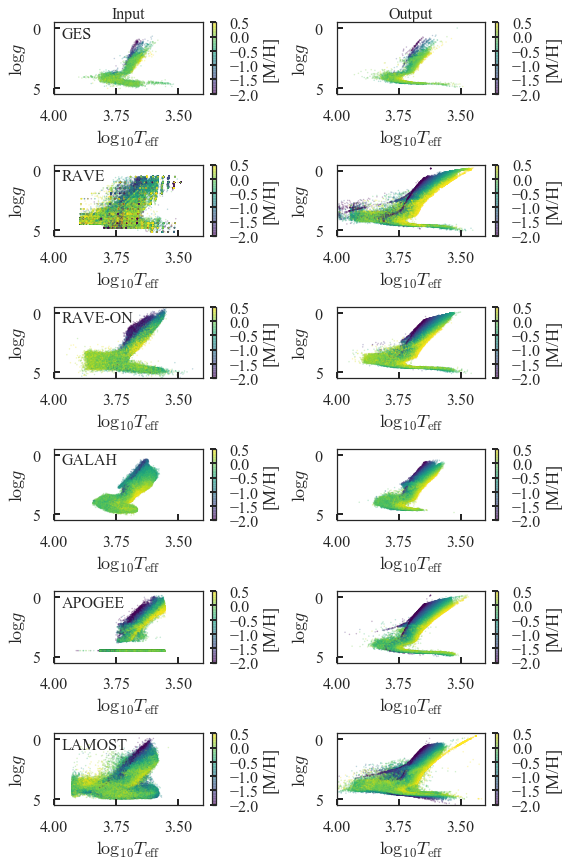

In [46]:
f,a=plt.subplots(6,2,figsize=[8.,12.])
plt.sca(a[0][0]);plt.gca().annotate('Input',(0.5,1.),
                                    fontsize=16,xycoords='axes fraction',ha='center',va='bottom')
plt.sca(a[0][1]);plt.gca().annotate('Output',(0.5,1.),
                                    fontsize=16,xycoords='axes fraction',ha='center',va='bottom')
input_output(ges_inputs, ges, a[0], 'GES')
input_output(rave_inputs, rave, a[1], 'RAVE')
input_output(raveON_inputs, raveON, a[2], 'RAVE-ON')
input_output(galah_inputs, galah, a[3], 'GALAH')
input_output(apogee_inputs, apogee, a[4], 'APOGEE')
input_output(lamost_inputs, lamost, a[5], 'LAMOST')
plt.savefig('hr_diagrams.png',dpi=200,bbox_inches='tight')

In [58]:
def giants(d):
    return d['logg']<3.
def turnoff(d):
    return (d['logg']<4.5)&(d['logg']>3.6)&(d['log10_teff']<4.1)
def hq_age(d):
    return (d['log10_age']>-1)&(d['log10_age_err']*np.log(10.)<0.3)

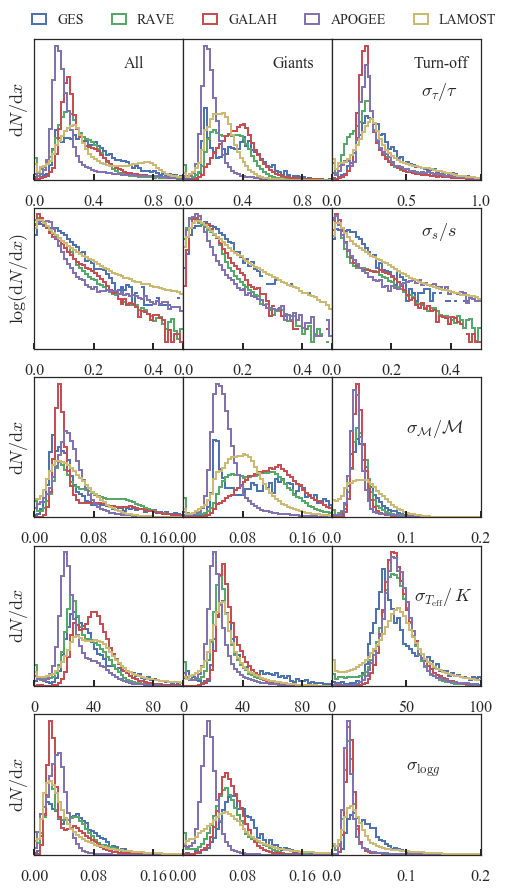

In [12]:
from matplotlib.ticker import MaxNLocator
f,a=plt.subplots(5,3,figsize=[8,15.])
plt.sca(a[0][0])
plt.subplots_adjust(wspace=0.)
[plt.hist(s['log10_age_err'][s['log10_age']>-.1]*np.log(10.),bins=50,
          histtype='step',range=[0.,1.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
plt.legend(loc='lower left',bbox_to_anchor=(-0.1,1.), ncol=5, handlelength=1, fontsize=14)
plt.annotate('All', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)

plt.sca(a[0][1])
plt.annotate('Giants', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist(s['log10_age_err'][(s['log10_age']>-.1)&giants(s)]*np.log(10.),bins=50,
          histtype='step',range=[0.,1.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.legend()
plt.sca(a[0][2])
plt.annotate('Turn-off', xy=(0.55,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist(s['log10_age_err'][(s['log10_age']>-.1)&turnoff(s)]*np.log(10.),bins=50,
          histtype='step',range=[0.,1.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.annotate(r'$\sigma_\tau/\tau$', xy=(0.6,0.6), xycoords='axes fraction', fontsize=18)

plt.sca(a[1][0])
plt.subplots_adjust(wspace=0.)
[plt.hist((s['dist_err']/s['dist'])[s['log10_age']>-.1],bins=50,
          histtype='step',range=[0.,0.5],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_d/d$')
plt.semilogy()

# plt.legend()
plt.sca(a[1][1])
[plt.hist((s['dist_err']/s['dist'])[(s['log10_age']>-.1)&giants(s)],bins=50,
          histtype='step',range=[0.,0.5],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_d/d$')
plt.semilogy()
# plt.legend()
plt.sca(a[1][2])
[plt.hist((s['dist_err']/s['dist'])[(s['log10_age']>-.1)&turnoff(s)],bins=50,
          histtype='step',range=[0.,0.5],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_d/d$')
plt.annotate(r'$\sigma_s/s$', xy=(0.6,0.8), xycoords='axes fraction', fontsize=18)
plt.semilogy()

plt.sca(a[2][0])
[plt.hist((s['mass_err']/s['mass'])[s['log10_age']>-.1],bins=50,
          histtype='step',range=[0.,0.2],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.annotate('All', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)

plt.sca(a[2][1])
# plt.annotate('Giants', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['mass_err']/s['mass'])[(s['log10_age']>-.1)&giants(s)],bins=50,
          histtype='step',range=[0.,0.2],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.legend()
plt.sca(a[2][2])
# plt.annotate('Turn-off', xy=(0.55,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['mass_err']/s['mass'])[(s['log10_age']>-.1)&turnoff(s)],bins=50,
          histtype='step',range=[0.,0.2],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.annotate(r'$\sigma_\mathcal{M}/\mathcal{M}$', xy=(0.5,0.6), xycoords='axes fraction', fontsize=18)

plt.sca(a[3][0])
[plt.hist((s['log10_teff_err']*np.log(10.)*np.power(10.,s['log10_teff']))[s['log10_age']>-.1],bins=50,
          histtype='step',range=[0.,100],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.annotate('All', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)

plt.sca(a[3][1])
# plt.annotate('Giants', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['log10_teff_err']*np.log(10.)*np.power(10.,s['log10_teff']))[(s['log10_age']>-.1)&giants(s)],bins=50,
          histtype='step',range=[0.,100],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.legend()
plt.sca(a[3][2])
# plt.annotate('Turn-off', xy=(0.55,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['log10_teff_err']*np.log(10.)*np.power(10.,s['log10_teff']))[(s['log10_age']>-.1)&turnoff(s)],bins=50,
          histtype='step',range=[0.,100],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.annotate(r'$\sigma_{T_\mathrm{eff}}/\,K$', xy=(0.55,0.6), xycoords='axes fraction', fontsize=18)

plt.sca(a[4][0])
[plt.hist((s['logg_err'])[s['log10_age']>-.1],bins=50,
          histtype='step',range=[0.,0.2],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.annotate('All', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)

plt.sca(a[4][1])
# plt.annotate('Giants', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['logg_err'])[(s['log10_age']>-.1)&giants(s)],bins=50,
          histtype='step',range=[0.,0.2],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.legend()
plt.sca(a[4][2])
# plt.annotate('Turn-off', xy=(0.55,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['logg_err'])[(s['log10_age']>-.1)&turnoff(s)],bins=50,
          histtype='step',range=[0.,0.2],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.annotate(r'$\sigma_{\log g}$', xy=(0.5,0.6), xycoords='axes fraction', fontsize=18)

for i in range(3):
    a[0][i].set_xlim(0.,1.)
    a[1][i].set_xlim(0.,0.5)
    a[2][i].set_xlim(0.,0.2)
    a[3][i].set_xlim(0.,100)
    a[4][i].set_xlim(0.,0.2)
for i in range(5):
    a[i][0].set_ylabel(r'$\mathrm{d}N/\mathrm{d}x$')
    for j in range(3):
        a[i][j].axes.get_yaxis().set_ticks([])
    for j in range(2):
        a[i][j].xaxis.set_major_locator(MaxNLocator(nbins=3))
a[1][0].set_ylabel(r'$\log(\mathrm{d}N/\mathrm{d}x)$')
# plt.legend()
plt.savefig('uncertainties.pdf', bbox_inches='tight')

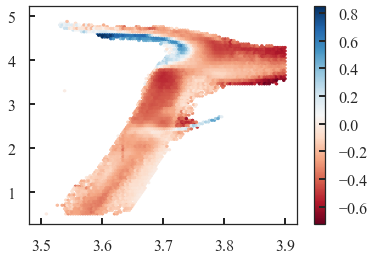

In [389]:
plt.hexbin(joint_table[joint_table['best']==1]['log10_teff'],
          joint_table[joint_table['best']==1]['logg'],
          C=joint_table[joint_table['best']==1]['log10age_Z_corr'],cmap=plt.cm.RdBu,
          extent=[3.5,3.9,0.5,5.],mincnt=20)
plt.colorbar()

# On-sky maps

In [452]:
import healpy as hp
def gen_fast_map(data, nside=64, bin_edges=[0.,0.],label='', title=None):
    b = np.rad2deg(data.b)
    l = np.rad2deg(data.l)
    fltr = (b>-90.)&(b<90.)
    l=l[fltr]
    b=b[fltr]
    ip_ = hp.ang2pix(nside, l, b, lonlat=True)
    npixel  = hp.nside2npix(nside)
    map_ = np.bincount(ip_,minlength=npixel)
    map = np.log10(map_+1.)
    if title is None:
        title='%0.2f,%0.2f'%(bin_edges[0],bin_edges[1])
    hp.visufunc.mollview(map,hold=True,title=title,unit=label)

def gen_fast_map_fld(data, fld, nside=64, vmin=None, vmax=None, 
                     bin_edges=[0.,0.],cmap=plt.cm.viridis,label='',rot=None, title=None, mincnt=10):
    cmap.set_under('white')
    b = np.rad2deg(data.b)
    l = np.rad2deg(data.l)
    fltr = (b>-90.)&(b<90.)
    l=l[fltr]
    b=b[fltr]
    fldd=data[fld][fltr]
    ip_ = hp.ang2pix(nside, l, b, lonlat=True)
    npixel  = hp.nside2npix(nside)
    map = np.array([np.nanmedian(fldd[ip_==i]) for i in range(npixel)])
    cnt_ = np.bincount(ip_,minlength=npixel)
    map[cnt_<mincnt]=np.nan
    if title is None:
        title='%0.2f,%0.2f'%(bin_edges[0],bin_edges[1])
    hp.visufunc.mollview(map,hold=True,min=vmin,max=vmax,
                    title=title,cmap=cmap,unit='',rot=rot)
    plt.annotate(label,xy=(0.5,-0.2),xycoords='axes fraction',fontsize=20,ha='center',va='top')

In [358]:
P = joint_table.to_pandas().reset_index(drop=True)
P = P[P['best']==1][['l','b','age','log10_age_err','logg','log10_teff','log10_av','s']]

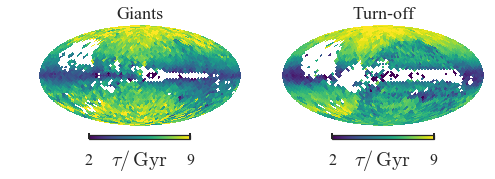

In [366]:
from matplotlib.colors import LogNorm
f,a=plt.subplots(1,2,figsize=[8.,3.])
plt.sca(a[0])
gen_fast_map_fld(P[giants(P)], 'age',nside=16,vmin=2.,vmax=9., label=r'$\tau/\,\mathrm{Gyr}$', title='Giants')
plt.sca(a[1])
gen_fast_map_fld(P[turnoff(P)], 'age',nside=16,vmin=2.,vmax=9., label=r'$\tau/\,\mathrm{Gyr}$', title='Turn-off')
plt.savefig('age_distribution.pdf', bbox_inches='tight')

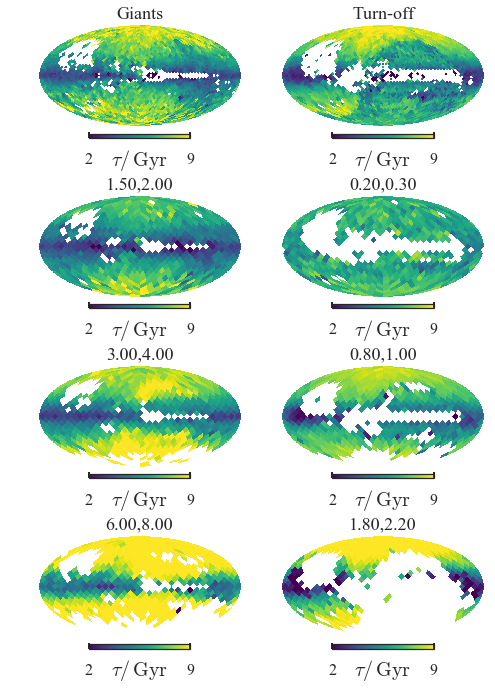

In [474]:
f,a=plt.subplots(4,2,figsize=[8.,12.])
plt.sca(a[0][0])
gen_fast_map_fld(P[giants(P)], 'age',nside=16,vmin=2.,vmax=9., label=r'$\tau/\,\mathrm{Gyr}$', title='Giants')
plt.sca(a[1][0])
gen_fast_map_fld(P[giants(P)&(P['s']>1.5)&(P['s']<2.)],
                 'age',nside=8,vmin=2.,vmax=9.,bin_edges=[1.5,2.], label=r'$\tau/\,\mathrm{Gyr}$')
plt.sca(a[2][0])
gen_fast_map_fld(P[giants(P)&(P['s']>3.)&(P['s']<4.)],
                 'age',nside=8,vmin=2.,vmax=9.,bin_edges=[3.,4.], label=r'$\tau/\,\mathrm{Gyr}$')
plt.sca(a[3][0])
gen_fast_map_fld(P[giants(P)&(P['s']>6.)&(P['s']<8.)],
                 'age',nside=8,vmin=2.,vmax=9.,bin_edges=[6.,8.], label=r'$\tau/\,\mathrm{Gyr}$')
plt.sca(a[0][1])
gen_fast_map_fld(P[turnoff(P)], 'age',nside=16,vmin=2.,vmax=9., label=r'$\tau/\,\mathrm{Gyr}$', title='Turn-off')
plt.sca(a[1][1])
gen_fast_map_fld(P[turnoff(P)&(P['s']>0.2)&(P['s']<0.3)],
                 'age',nside=8,vmin=2.,vmax=9.,mincnt=20,rot=0, label=r'$\tau/\,\mathrm{Gyr}$',bin_edges=[0.2,0.3])
plt.sca(a[2][1])
gen_fast_map_fld(P[turnoff(P)&(P['s']>0.8)&(P['s']<1.)],
                 'age',nside=8,vmin=2.,vmax=9.,mincnt=20,rot=0, label=r'$\tau/\,\mathrm{Gyr}$',bin_edges=[0.8,1.])
plt.sca(a[3][1])
gen_fast_map_fld(P[turnoff(P)&(P['s']>1.8)&(P['s']<2.2)],
                 'age',nside=8,vmin=2.,vmax=9.,mincnt=20,rot=0, label=r'$\tau/\,\mathrm{Gyr}$',bin_edges=[1.8,2.2])
plt.savefig('age_distribution_split.pdf', bbox_inches='tight')

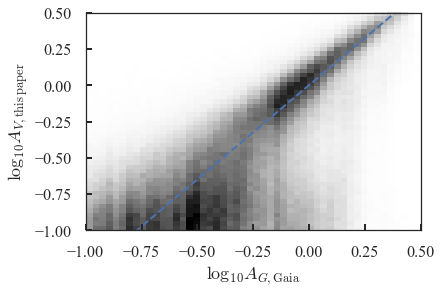

In [483]:
plt.hist2d(np.log10(jointinputs.a_g_val)[(joint['flag']==0)],
           joint['log10_av'][(joint['flag']==0)],range=[[-1.,0.5],[-1.,0.5]],bins=50);
xx = np.linspace(-1.,0.5)
plt.plot(xx,xx/0.77,label=r'$\frac{R(G)}{R(V)}=0.77$',ls='dashed')
plt.xlabel(r'$\log_{10}A_{G,\mathrm{Gaia}}$')
plt.ylabel(r'$\log_{10}A_{V,\mathrm{this\,paper}}$')
plt.savefig('extinction_ag_av.pdf', bbox_inches='tight')

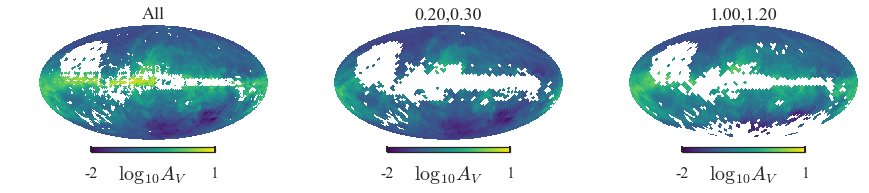

In [377]:
from matplotlib.colors import LogNorm
f,a=plt.subplots(1,3,figsize=[15.,2.5])
plt.sca(a[1])
gen_fast_map_fld(joint_table[(joint_table['best']==1)&(joint_table['s']<0.3)&(joint_table['s']>0.2)].to_pandas(),
                 'log10_av',nside=16,vmin=-2.,vmax=1.,label=r'$\log_{10}A_V$',bin_edges=[0.2,0.3])
plt.sca(a[2])
gen_fast_map_fld(joint_table[(joint_table['best']==1)&(joint_table['s']>1.)&(joint_table['s']<1.2)].to_pandas(),
                 'log10_av',nside=16,vmin=-2.,vmax=1.,label=r'$\log_{10}A_V$',bin_edges=[1.,1.2])
plt.sca(a[0])
gen_fast_map_fld(joint_table[(joint_table['best']==1)].to_pandas(),
                 'log10_av',nside=32,vmin=-2.,vmax=1.,label=r'$\log_{10}A_V$',bin_edges=[3.,3.5], title='All')
# plt.sca(a[2])
# plt.hist2d(np.log10(jointinputs.a_g_val)[(joint_table['best']==1)],
#            joint_table['log10_av'][(joint_table['best']==1)],range=[[-1.,0.5],[-1.,0.5]],bins=50);#,norm=LogNorm());
# xx = np.linspace(-1.,0.5)
# # plt.plot(xx,xx,label=r'$\frac{R(G)}{R(V)}=1$')
# plt.plot(xx,xx/0.77,label=r'$\frac{R(G)}{R(V)}=0.77$',ls='dashed')
# # plt.legend(loc='upper left')
# plt.xlabel(r'$\log_{10}A_{G,\mathrm{Gaia}}$')
# plt.ylabel(r'$\log_{10}A_{V,\mathrm{this\,paper}}$')
# plt.tight_layout()
plt.savefig('extinction.pdf',bbox_inches='tight')

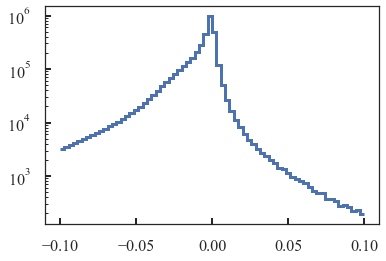

In [487]:
plt.hist(joint['par_err']-jointinputs['parallax_error'],
         histtype='step',lw=3,bins=70,range=[-.1,.1]);
plt.semilogy();

## Velocity dispersion, action dispersion

In [242]:
import sys
sys.path.append('../../rave_cannon_distances/')
sys.path.append('../../rave_cannon_distances/veldisp_plots/')
from plotting_rave import *

In [49]:
def plot_veldisp_with_age(data,sort_col='age',xlabel=r'$\tau/\mathrm{Gyr}$',
                          title="",with_y=True,with_legend=True,nstars=500,ls='-'):
    print 'STANDARD ERROR NO SQRT(2)'
    data = data.sort_values(sort_col)
    label=True
    for df in np.array_split(data,len(data)/nstars):
        if(label):
            stot=0.
            stot_err=0.
            data_set = df[df.vR!=np.inf]
            data_set = sigma_clip(data_set.vR).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[data_set.std()],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[data_set.std()/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[0],label=r'$\sigma_R$')
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vphi!=np.inf]
            data_set = sigma_clip(data_set.vphi).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[data_set.std()],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[data_set.std()/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[1],label=r'$\sigma_\phi$')
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vz!=np.inf]
            data_set = sigma_clip(data_set.vz).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[data_set.std()],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[data_set.std()/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[2],label=r'$\sigma_z$')
            eb[-1][0].set_linestyle(ls)
            eb=plt.errorbar([df[sort_col].median()],[np.sqrt(stot)],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[np.sqrt(stot_err/stot)],
                         ms=2,fmt='o',color='k',label=r'$\sigma_\mathrm{tot}$')
            eb[-1][0].set_linestyle(ls)
        else:
            stot=0.
            stot_err=0.
            data_set = df[df.vR!=np.inf]
            data_set = sigma_clip(data_set.vR).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[data_set.std()],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[data_set.std()/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[0])
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vphi!=np.inf]
            data_set = sigma_clip(data_set.vphi).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[data_set.std()],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[data_set.std()/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[1])
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vz!=np.inf]
            data_set = sigma_clip(data_set.vz).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[data_set.std()],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[data_set.std()/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[2])
            eb[-1][0].set_linestyle(ls)
            eb=plt.errorbar([df[sort_col].median()],[np.sqrt(stot)],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[np.sqrt(stot_err/stot)],
                         ms=2,fmt='o',color='k')
            eb[-1][0].set_linestyle(ls)
        label=False
    plt.xlabel(xlabel)
    if with_y:
        plt.ylabel(r'$\sigma_i/\mathrm{km\,s}^{-1}$')
    else:
        plt.gca().set_yticklabels([])
    plt.annotate(title,xy=(0.95,0.05),xycoords='axes fraction',ha='right',va='bottom',fontsize=20)
    if with_legend:
        plt.legend(loc='lower center',ncol=4,bbox_to_anchor=(1.,1.02))
    plt.ylim(0.,)

In [240]:
from scipy.optimize import leastsq, brentq
def mini(v,sig,s=None):
    if s is None:
        s = np.nanstd(v)
    m = np.nanmedian(v)
    v, sig = v[np.abs(v-m)<3.*s], sig[np.abs(v-m)<3.*s]
    def l(p):
        return np.sum((v-m)**2/(p**2+sig**2)**2-1./(p**2+sig**2))
    ll = l(s)
    s1 = .95*s
    while ll*l(s1)>0 and s1>5.:
        s1 *=0.95
    if s1<5.:
        return np.nan
    return brentq(l,s1,s,xtol=1e-2)

In [51]:
ss = joint.groupby(pd.cut(joint['age'],2))

In [52]:
def plot_veldisp_with_age_errors(data,sort_col='age',xlabel=r'$\tau/\mathrm{Gyr}$',
                          title="",with_y=True,with_legend=True,nbins=30,ls='-', grouping='equal'):
    print 'STANDARD ERROR NO SQRT(2)'
    data = data.sort_values(sort_col)
    label=True
    if grouping=='equal':
        groups = np.array_split(data,nbins)
    elif grouping=='even':
        groups = [g[1] for g in data.groupby(pd.cut(data[sort_col],nbins))]
    else: 
        groups = [g[1] for g in data.groupby(pd.cut(np.log(data[sort_col]),nbins))]
    for df in groups:
        if(label):
            stot=0.
            stot_err=0.
            stotE=0.
            stotE_err=0.
            
            data_set = df[df.vR!=np.inf]
            sig = mini(data_set.vR.values,data_set.vR_err.values,sigma_clip(data_set.vR).clipped.std())
            stotE += sig**2
            stotE_err += sig**2*(sig/np.sqrt(len(data_set)))**2
            
            data_set = sigma_clip(data_set.vR).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[0],label=r'$\sigma_R$')
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vphi!=np.inf]
            sig = mini(data_set.vphi.values,data_set.vphi_err.values,sigma_clip(data_set.vphi).clipped.std())
            stotE += sig**2
            stotE_err += sig**2*(sig/np.sqrt(len(data_set)))**2
            
            data_set = sigma_clip(data_set.vphi).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[1],label=r'$\sigma_\phi$')
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vz!=np.inf]
            sig = mini(data_set.vz.values,data_set.vz_err.values,sigma_clip(data_set.vz).clipped.std())
            stotE += sig**2
            stotE_err += sig**2*(sig/np.sqrt(len(data_set)))**2
            
            data_set = sigma_clip(data_set.vz).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[2],label=r'$\sigma_z$')
            eb[-1][0].set_linestyle(ls)
            eb=plt.errorbar([df[sort_col].median()],[np.sqrt(stotE)],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[np.sqrt(stotE_err/stotE)],
                         ms=2,fmt='o',color='k',label=r'$\sigma_\mathrm{tot}$')
            eb[-1][0].set_linestyle(ls)
        else:
            stot=0.
            stot_err=0.
            stotE=0.
            stotE_err=0.
            data_set = df[df.vR!=np.inf]
            sig = mini(data_set.vR.values,data_set.vR_err.values,sigma_clip(data_set.vR).clipped.std())
            stotE += sig**2
            stotE_err += sig**2*(sig/np.sqrt(len(data_set)))**2
            
            data_set = sigma_clip(data_set.vR).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[0])
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vphi!=np.inf]
            sig = mini(data_set.vphi.values,data_set.vphi_err.values,sigma_clip(data_set.vphi).clipped.std())
            stotE += sig**2
            stotE_err += sig**2*(sig/np.sqrt(len(data_set)))**2
            
            data_set = sigma_clip(data_set.vphi).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[1])
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vz!=np.inf]
            sig = mini(data_set.vz.values,data_set.vz_err.values,sigma_clip(data_set.vz).clipped.std())
            stotE += sig**2
            stotE_err += sig**2*(sig/np.sqrt(len(data_set)))**2
            
            data_set = sigma_clip(data_set.vz).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[2])
            eb[-1][0].set_linestyle(ls)
            eb=plt.errorbar([df[sort_col].median()],[np.sqrt(stotE)],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[np.sqrt(stotE_err/stotE)],
                         ms=2,fmt='o',color='k')
            eb[-1][0].set_linestyle(ls)
        label=False
    plt.xlabel(xlabel)
    if with_y:
        plt.ylabel(r'$\sigma_i/\mathrm{km\,s}^{-1}$')
    else:
        plt.gca().set_yticklabels([])
    plt.annotate(title,xy=(0.95,0.05),xycoords='axes fraction',ha='right',va='bottom',fontsize=20)
    if with_legend:
        plt.legend(loc='lower center',ncol=4,bbox_to_anchor=(1.,1.02))
    plt.ylim(0.,)

In [53]:
def plot_actiondisp_with_age_errors(data,sort_col='age',xlabel=r'$\tau/\mathrm{Gyr}$',
                          title="",with_y=True,with_legend=True,nbins=30,ls='-', grouping='equal'):
    print 'NOT USING ERRORS'
    data = data.sort_values(sort_col)
    label=True
    if grouping=='equal':
        groups = np.array_split(data,nbins)
    elif grouping=='even':
        groups = [g[1] for g in data.groupby(pd.cut(data[sort_col],nbins))]
    else: 
        groups = [g[1] for g in data.groupby(pd.cut(np.log(data[sort_col]),nbins))]
    for df in groups:
        if(label):
            
            data_set = df[(df.JR!=np.inf)&(df.JR==df.JR)]
            sig = mini(data_set.JR.values,data_set.JR_err.values,sigma_clip(data_set.JR).clipped.std())
            sig = sigma_clip(data_set.JR).clipped.std()
            data_set = sigma_clip(data_set.JR).clipped
            
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[0],label=r'$\sigma_{JR}$')
            eb[-1][0].set_linestyle(ls)
            
            data_set = df[(df.Jz!=np.inf)&(df.Jz==df.Jz)]
            sig = mini(data_set.Jz.values,data_set.Jz_err.values,sigma_clip(data_set.Jz).clipped.std())
            sig = sigma_clip(data_set.Jz).clipped.std()
            
            data_set = sigma_clip(data_set.Jz).clipped
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[2],label=r'$\sigma_{Jz}$')
            eb[-1][0].set_linestyle(ls)
        else:
            data_set = df[(df.JR!=np.inf)&(df.JR==df.JR)]
            sig = mini(data_set.JR.values,data_set.JR_err.values,sigma_clip(data_set.JR).clipped.std())
            sig = sigma_clip(data_set.JR).clipped.std()
            
            data_set = sigma_clip(data_set.JR).clipped
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[0])
            eb[-1][0].set_linestyle(ls)
            
            data_set = df[(df.Jz!=np.inf)&(df.Jz==df.Jz)&(df.Jz_err==df.Jz_err)]
            sig = mini(data_set.Jz.values,data_set.Jz_err.values,sigma_clip(data_set.Jz).clipped.std())
            sig = sigma_clip(data_set.Jz).clipped.std()
            
            data_set = sigma_clip(data_set.Jz).clipped
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[2])
            eb[-1][0].set_linestyle(ls)
        label=False
    plt.xlabel(xlabel)
    if with_y:
        plt.ylabel(r'$\sigma_{Ji}/\mathrm{kpc\,km\,s}^{-1}$')
    else:
        plt.gca().set_yticklabels([])
    plt.annotate(title,xy=(0.95,0.05),xycoords='axes fraction',ha='right',va='bottom',fontsize=20)
    if with_legend:
        plt.legend(loc='lower center',ncol=4,bbox_to_anchor=(1.,1.02))
    plt.ylim(0.,)

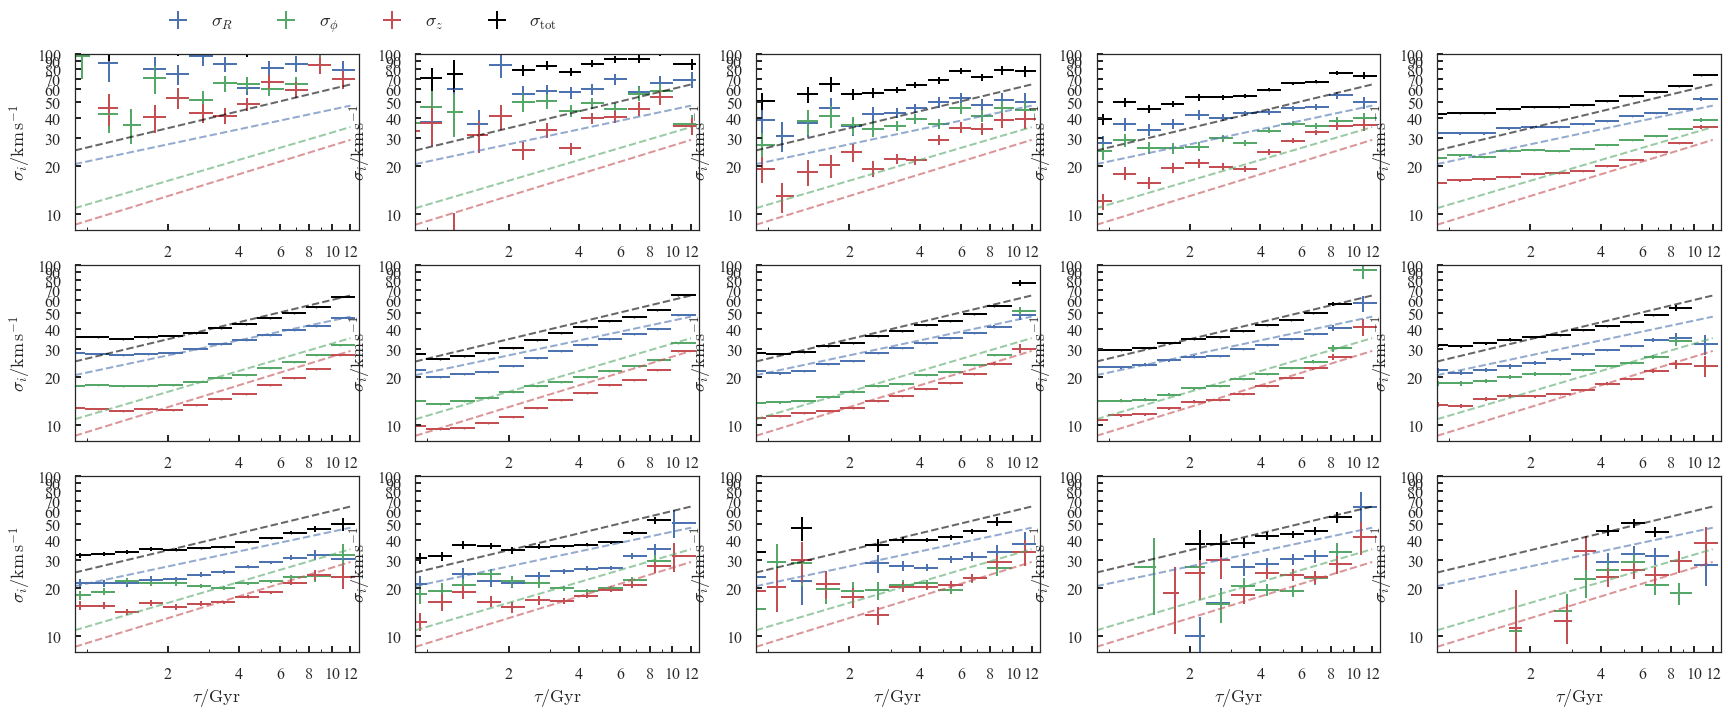

In [83]:
import matplotlib

deltaR=0.4
deltaZ=0.4
deltaZ2=0.
meanR = 8.2

f,a=plt.subplots(3,5,figsize=[29.5,11.])
ll=True
for meanR,ax in zip([3.2,4.2,5.2,6.2,7.2,
                     8.2,9.2,10.2,11.2,12.2,
                     13.2,14.2,15.2,16.2,17.2],a.flatten()):
    plt.sca(ax)
    jj = joint_table[(joint_table['log10_age']>-1.)&
                                       (joint_table['log10_age_err']<0.4)&
                                       (joint_table['vR']==joint_table['vR'])&(joint_table['flag']==0)&
                                       (joint_table['R']<meanR+deltaR)&(joint_table['R']>meanR-deltaR)&
                                       (np.abs(joint_table['z'])<deltaZ)&
                                       (np.abs(joint_table['z'])>deltaZ2)].to_pandas().reset_index(drop=True)
    plot_veldisp_with_age_errors(jj, nbins=20, grouping='logeven', with_legend=ll)
    ll=False
    plt.ylim(8.,100.)
    plt.xlim(0.8,13.)
    plt.gca().set_yscale('log');
    plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.gca().get_yaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
    plt.gca().get_yaxis().set_minor_locator(matplotlib.ticker.NullLocator())
    plt.gca().get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
    plt.gca().set_xscale('log');
    plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.gca().get_xaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
#     label = 'Combined'
#     label_loc = (0.8,0.2)
#     plt.annotate(label,xy=label_loc,xycoords='axes fraction',
#                  ha='right',va='bottom',fontsize=18)
    xx = np.linspace(0.8,12.)
    plt.plot(xx,22.*xx**0.31,ls='dashed',alpha=0.6)
    plt.plot(xx,12.*xx**0.43,ls='dashed',alpha=0.6)
    plt.plot(xx,9.5*xx**0.45,ls='dashed',alpha=0.6)
    plt.plot(xx,27.*xx**0.35,color='k',ls='dashed',alpha=0.6)
plt.savefig('kinematics.pdf', bbox_inches='tight')

NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS
NOT USING ERRORS


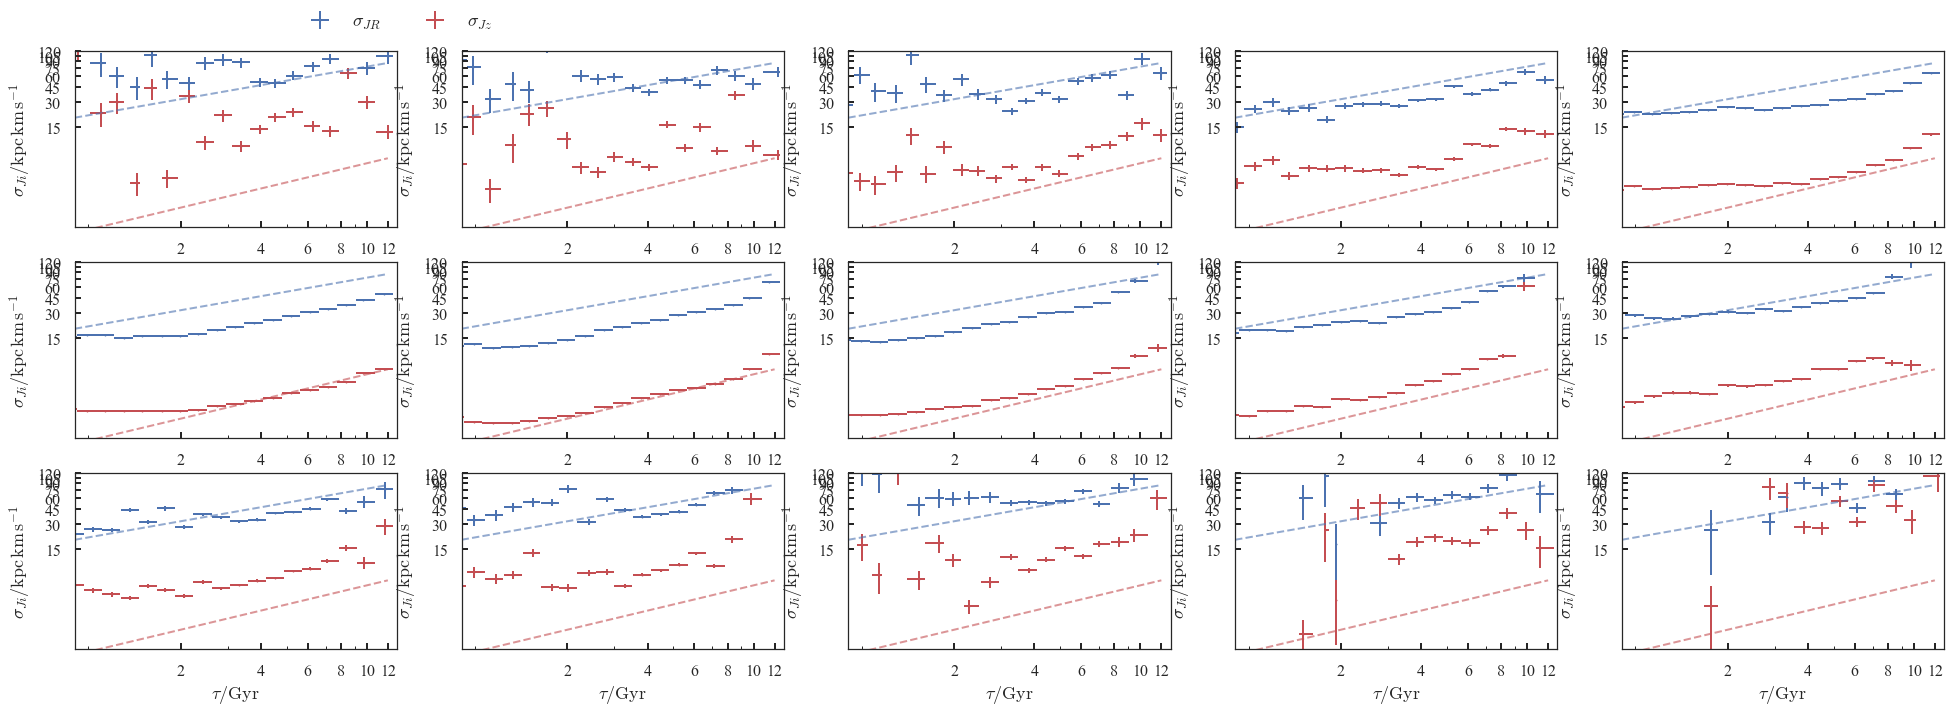

In [84]:
import matplotlib

deltaR=0.4
deltaZ=0.4
meanR = 8.2

f,a=plt.subplots(3,5,figsize=[33.5,11.])
ll=True
for meanR,ax in zip([3.2,4.2,5.2,6.2,7.2,
                     8.2,9.2,10.2,11.2,12.2,
                     13.2,14.2,15.2,16.2,17.2],a.flatten()):
    plt.sca(ax)
    
    jj = joint_table[(joint_table['log10_age']>-1.)&
                                       (joint_table['log10_age_err']<0.4)&
                                       (joint_table['vR']==joint_table['vR'])&(joint_table['flag']==0)&
                                       (joint_table['R']<meanR+deltaR)&(joint_table['R']>meanR-deltaR)&
                                       (np.abs(joint_table['z'])<deltaZ)].to_pandas().reset_index(drop=True)
    plot_actiondisp_with_age_errors(jj, grouping='logeven', with_legend=ll)
    ll=False
    plt.ylim(1.,120.)
    plt.xlim(0.8,13.)
    plt.gca().set_yscale('log');
    plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.gca().get_yaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
    plt.gca().get_yaxis().set_minor_locator(matplotlib.ticker.NullLocator())
    plt.gca().get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
    plt.gca().set_xscale('log');
    plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.gca().get_xaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

    xx = np.linspace(0.8,12.)
    plt.plot(xx,22.*xx**0.55,ls='dashed',alpha=0.6)
    plt.plot(xx,xx**0.75,ls='dashed',alpha=0.6, color=sns.color_palette()[2])
plt.savefig('actions.pdf', bbox_inches='tight')

In [297]:
gg = joint_table[(joint_table['best']==1)&(turnoff(joint_table))&
                 (joint_table['log10_age_err']<0.3)&(abs(joint_table['z'])<1.5)&
                 (abs(joint_table['R']-8.2)<1.4)].to_pandas()
gg2 = joint_table[(joint_table['best']==1)&(giants(joint_table))&
                  (joint_table['log10_age_err']<0.3)&(abs(joint_table['z'])<1.5)&
                  (joint_table['s']<8.)].to_pandas()

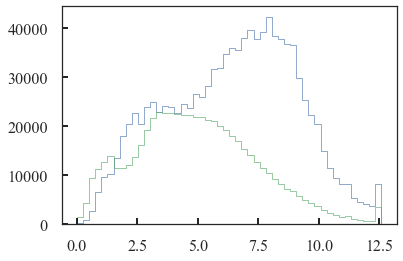

In [298]:
plt.hist(gg['age'],bins=50,histtype='step');
plt.hist(gg2['age'],bins=50,histtype='step');

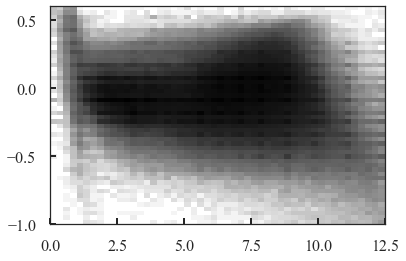

In [299]:
plt.hist2d(gg['age'],gg['Z'],bins=50,
           norm=LogNorm(),
           range=[[0.,12.5],[-1.,0.6]]);

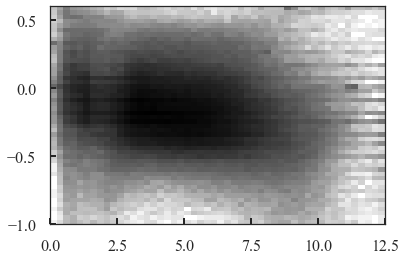

In [300]:
plt.hist2d(gg2['age'],gg2['Z'],bins=50,
           norm=LogNorm(),
           range=[[0.,12.5],[-1.,0.6]]);

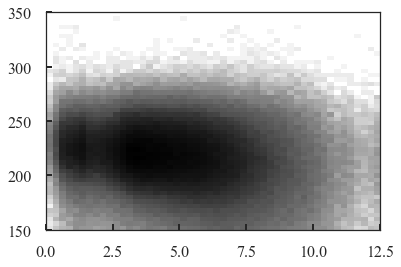

In [301]:
plt.hist2d(gg2['age'],gg2['vphi'],bins=50,
           norm=LogNorm(),
           range=[[0.,12.5],[150.,350.]]);

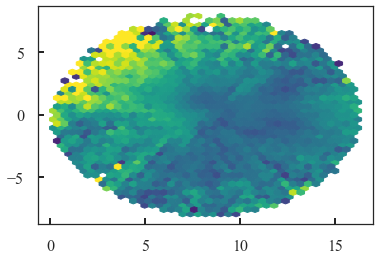

In [302]:
plt.hexbin(gg2['R']*np.cos(gg2['phi']),
           gg2['R']*np.sin(gg2['phi']),
           C=gg2['age'],vmin=2.,vmax=9.,cmap=plt.cm.viridis,gridsize=40,
           reduce_C_function=np.nanmedian);

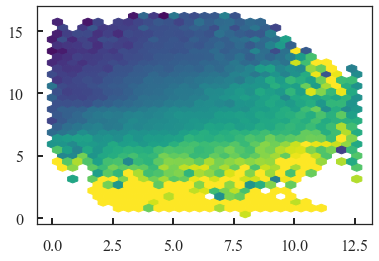

In [361]:
plt.hexbin(gg2['age'],
           gg2['R'],
           C=gg2['vR'],vmin=10.,vmax=80.,
           cmap=plt.cm.viridis,
           gridsize=30,mincnt=10,
           reduce_C_function=lambda x: (np.nanpercentile(x,84.)-np.nanpercentile(x,16.))/2.);

In [303]:
from plotting_general import running_median

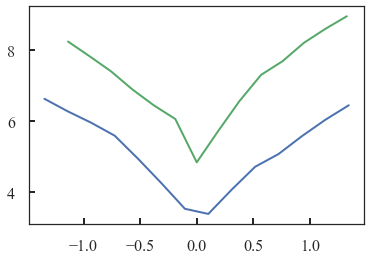

In [304]:
r = running_median(gg2['z'],gg2['age'])
plt.plot(r[0],r[1])
r = running_median(gg['z'],gg['age'])
plt.plot(r[0],r[1])

In [231]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
from scipy.stats import gaussian_kde
def get_scalarMap(vals):
    cm = plt.cm.get_cmap(plt.cm.plasma,len(vals))
    cNorm=colors.Normalize(vmin=vals[0],vmax=vals[-1])
    sM = cmx.ScalarMappable(norm=cNorm,cmap=cm)
    sM._A=[]
    return sM
def plot_distributions(data,ax,compt='vR',sort_col='age',bins=50,range=[-150.,150.],cbar=False,label=None,
                      xlabel=None):
    data = data.copy()
    age_bins=np.linspace(0.,12.,6)
    age_centroids=.5*(age_bins[1:]+age_bins[:-1])
    scalarMap = get_scalarMap(age_centroids)
    nmax=0.
    for ad,au in zip(age_bins[:-1],age_bins[1:]):
        datasl = data[(data[sort_col]<au)&(data[sort_col]>ad)].reset_index(drop=True)
        datasl = datasl[datasl[compt].values==datasl[compt].values].reset_index(drop=True)
        dd = datasl[compt][(datasl[compt]>range[0])&(datasl[compt]<range[1])].values
#         n,b,p=ax.hist(datasl[compt],bins=bins,lw=3,histtype='step',range=range,normed=True,
#                       color=scalarMap.to_rgba(.5*(ad+au)))
#         if np.max(n)>nmax:
#             nmax=np.max(n)
#         ax.set_ylim(0.,nmax*1.1)
        sns.kdeplot(dd,
                      lw=3,
                      color=scalarMap.to_rgba(.5*(ad+au)),ax=ax)
        ax.set_xlim(*range)
#         kernel = gaussian_kde(dd)
#         xx = np.linspace(*range,num=1000)
#         ax.plot(xx,kernel(xx)*len(dd),lw=3,
#                       color=scalarMap.to_rgba(.5*(ad+au)))
    if compt=='phi':
        compt=r'\phi'
    if(xlabel):
        ax.set_xlabel(r'$v_{%s}/\mathrm{km\,s}^{-1}$'%compt)
    if(cbar):
        plt.colorbar(scalarMap,boundaries=age_bins,label=r'$\tau/\mathrm{Gyr}$')
    if(label):
        ax.annotate(label,xy=(0.05,0.95),xycoords='axes fraction',fontsize=14,ha='left',va='top')
    return scalarMap

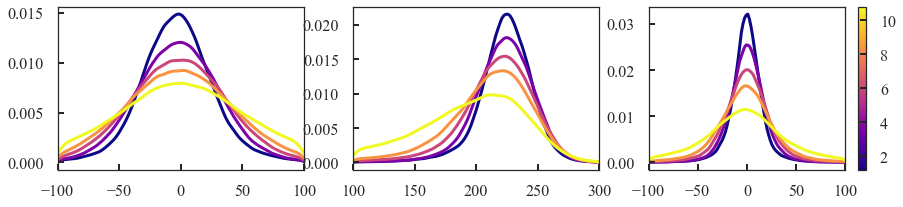

In [232]:
f,a=plt.subplots(1,3,figsize=[15.,3.])
plot_distributions(gg,a[0],range=[-100.,100.])
plot_distributions(gg,a[1],compt='vphi',range=[100.,300.])
C=plot_distributions(gg,a[2],compt='vz',range=[-100.,100.])
plt.colorbar(C)

### Grid

In [522]:
joint.columns

Index([u'APOGEE_ID', u'CNAME', u'JR', u'JR_err', u'Jz', u'Jz_err', u'Lz',
       u'Lz_err', u'R', u'R_err', u'Rc', u'Rc_err', u'Z', u'Z_err', u'b',
       u'dist', u'dist_err', u'dm', u'dm_Z_corr', u'dm_err',
       u'dm_log10age_corr', u'flag', u'l', u'log10_age', u'log10_age_err',
       u'log10_av', u'log10_av_err', u'log10_teff', u'log10_teff_err',
       u'log10age_Z_corr', u'logg', u'logg_err', u'mass', u'mass_err', u'mu_b',
       u'mu_b_err', u'mu_l', u'mu_l_err', u'obsid', u'par', u'par_err', u'phi',
       u'phi_err', u'raveid', u's', u's_err', u'sobject_id', u'source_id',
       u'vR', u'vR_err', u'vlos', u'vlos_err', u'vphi', u'vphi_err', u'vz',
       u'vz_err', u'z', u'z_err', u'age'],
      dtype='object')

In [59]:
gg = joint_table[(joint_table['best']==1)&(joint_table['log10_age_err']<0.2)
                 &((turnoff(joint_table))|giants(joint_table))].to_pandas()
print len(gg)

1804366


In [155]:
def deconvolve_kde(data,err_data,h,rangex):
    data = data[:,np.newaxis]
    err_data = err_data[:,np.newaxis]
    rangex = rangex[np.newaxis,:]
    def kernel(val):
        p=np.exp(- .5*(val - data) **2 / h**2) * (1.-.5*err_data**2/h**2*((val-data)**2/h**2-1.))/np.sqrt(2.*np.pi)
        p[p<0.]=0.
        return p
    K = kernel(rangex)
    return rangex[0],np.nansum(K,axis=0)/len(data)/h

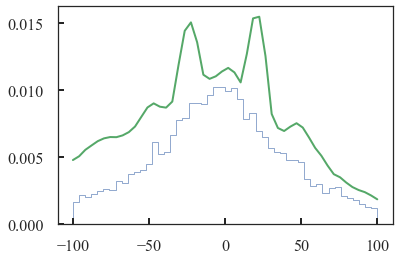

In [170]:
plt.hist(gg.vz[gg.s>10.][:10000].values,range=[-100.,100.],normed=True,histtype='step',bins=50)
x,y=deconvolve_kde(gg.vz[gg.s>10.][:10000].values,gg.vz_err[gg.s>10.][:10000].values,10.,np.linspace(-100.,100.))
plt.plot(x,y)

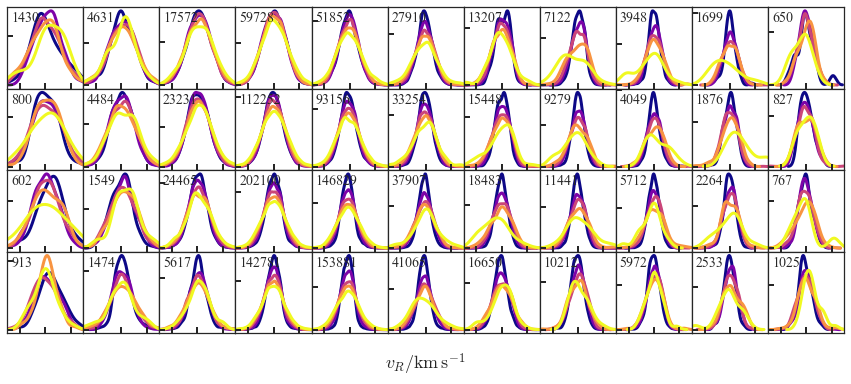

In [234]:
Rbins = np.array([4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
zbins = [0.,0.2,0.4,0.6,0.8]
f,a=plt.subplots(len(zbins)-1,len(Rbins)-1,figsize=[15.,6.])
plt.subplots_adjust(wspace=0.,hspace=0.)
for r in range(len(Rbins)-1):
    for z in range(len(zbins)-1):
        dd = gg[(gg['R']>Rbins[r])&(gg['R']<Rbins[r+1])
                             &(np.abs(gg['z'])>zbins[z])&(np.abs(gg['z'])<zbins[z+1])]
        plot_distributions(dd,a[len(zbins)-2-z][r],
                           compt='vR',range=[-150,150.],label=len(dd))
        a[z][r].set_yticklabels([])
        a[z][r].set_xticklabels([])
a[-1][(len(Rbins)-1)/2].set_xlabel(r'$v_{%s}/\mathrm{km\,s}^{-1}$'%'R')

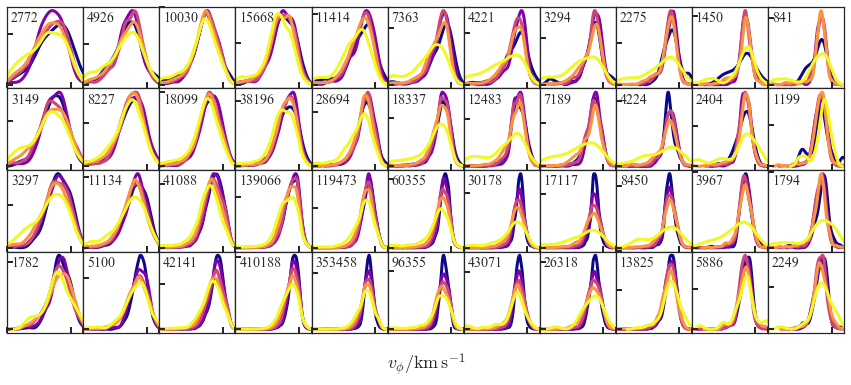

In [178]:
Rbins = np.array([4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
zbins = [0.,0.5,1.,1.5,2.]
f,a=plt.subplots(len(zbins)-1,len(Rbins)-1,figsize=[15.,6.])
plt.subplots_adjust(wspace=0.,hspace=0.)
for r in range(len(Rbins)-1):
    for z in range(len(zbins)-1):
        dd = gg[(gg['R']>Rbins[r])&(gg['R']<Rbins[r+1])
                             &(np.abs(gg['z'])>zbins[z])&(np.abs(gg['z'])<zbins[z+1])]
        plot_distributions(dd,a[len(zbins)-2-z][r],
                           compt='vphi',range=[0,300.],label=len(dd))
        a[z][r].set_yticklabels([])
        a[z][r].set_xticklabels([])
a[-1][(len(Rbins)-1)/2].set_xlabel(r'$v_{%s}/\mathrm{km\,s}^{-1}$'%'\phi')

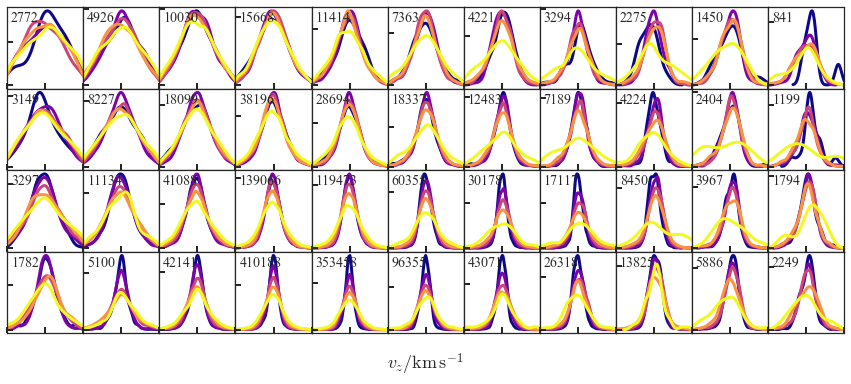

In [175]:
Rbins = np.array([4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
zbins = [0.,0.5,1.,1.5,2.]
f,a=plt.subplots(len(zbins)-1,len(Rbins)-1,figsize=[15.,6.])
plt.subplots_adjust(wspace=0.,hspace=0.)
for r in range(len(Rbins)-1):
    for z in range(len(zbins)-1):
        dd = gg[(gg['R']>Rbins[r])&(gg['R']<Rbins[r+1])
                             &(np.abs(gg['z'])>zbins[z])&(np.abs(gg['z'])<zbins[z+1])]
        plot_distributions(dd,a[len(zbins)-2-z][r],
                           compt='vz',range=[-100,100.],label=len(dd))
        a[z][r].set_yticklabels([])
        a[z][r].set_xticklabels([])
a[-1][(len(Rbins)-1)/2].set_xlabel(r'$v_{%s}/\mathrm{km\,s}^{-1}$'%'z')

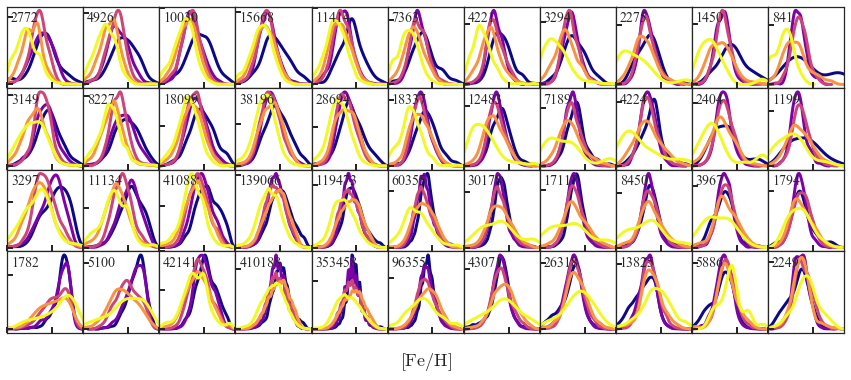

In [185]:
Rbins = np.array([4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
zbins = [0.,0.5,1.,1.5,2.]
f,a=plt.subplots(len(zbins)-1,len(Rbins)-1,figsize=[15.,6.])
plt.subplots_adjust(wspace=0.,hspace=0.)
for r in range(len(Rbins)-1):
    for z in range(len(zbins)-1):
        dd = gg[(gg['R']>Rbins[r])&(gg['R']<Rbins[r+1])
                             &(np.abs(gg['z'])>zbins[z])&(np.abs(gg['z'])<zbins[z+1])]
        plot_distributions(dd,a[len(zbins)-2-z][r],
                           compt='Z',range=[-1.,0.7],label=len(dd))
        a[z][r].set_yticklabels([])
        a[z][r].set_xticklabels([])
a[-1][(len(Rbins)-1)/2].set_xlabel(r'$[\mathrm{Fe}/\mathrm{H}]$')

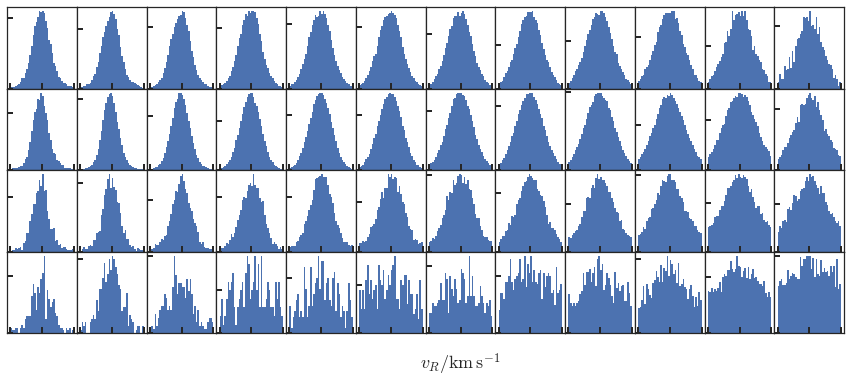

In [204]:
tbins = np.linspace(0.,12.,13)
Zbins = [-1.5,-1.,-0.5,0.,0.5]
f,a=plt.subplots(len(Zbins)-1,len(tbins)-1,figsize=[15.,6.])
plt.subplots_adjust(wspace=0.,hspace=0.)
for r in range(len(tbins)-1):
    for z in range(len(Zbins)-1):
        dd = gg[(gg['age']>tbins[r])&(gg['age']<tbins[r+1])
                             &(gg['Z']>Zbins[z])&(gg['Z']<Zbins[z+1])]
#         plot_distributions(dd,a[len(zbins)-2-z][r],
#                            compt='vz',range=[-100,100.],label=len(dd))
        compt='vR'
        plt.sca(a[len(Zbins)-2-z][r])
        rangex=[-100.,100.]
#         sns.kdeplot(dd[compt][(dd[compt]>rangex[0])&(dd[compt]<rangex[1])].values,
#                       lw=3)
#         plt.hist(dd[compt][(dd[compt]>rangex[0])&(dd[compt]<rangex[1])].values,range=rangex,bins=40)
        a[z][r].set_yticklabels([])
        a[z][r].set_xticklabels([])
a[-1][(len(tbins)-1)/2].set_xlabel(r'$v_{%s}/\mathrm{km\,s}^{-1}$'%'R')

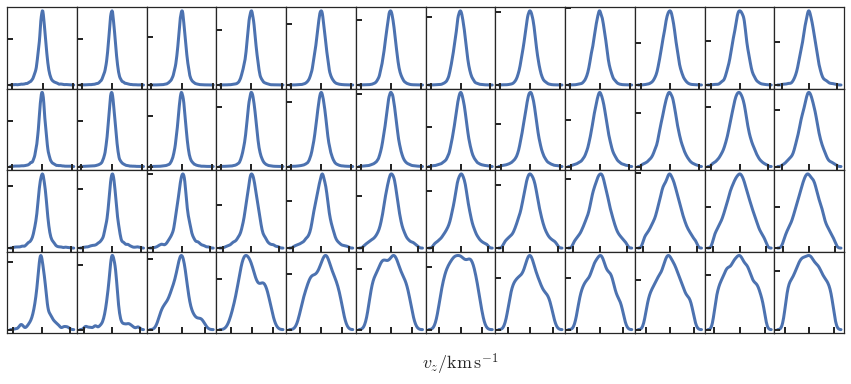

In [201]:
tbins = np.linspace(0.,12.,13)
Zbins = [-1.5,-1.,-0.5,0.,0.5]
f,a=plt.subplots(len(Zbins)-1,len(tbins)-1,figsize=[15.,6.])
plt.subplots_adjust(wspace=0.,hspace=0.)
for r in range(len(tbins)-1):
    for z in range(len(Zbins)-1):
        dd = gg[(gg['age']>tbins[r])&(gg['age']<tbins[r+1])
                             &(gg['Z']>Zbins[z])&(gg['Z']<Zbins[z+1])]
#         plot_distributions(dd,a[len(zbins)-2-z][r],
#                            compt='vz',range=[-100,100.],label=len(dd))
        compt='vz'
        plt.sca(a[len(Zbins)-2-z][r])
        rangex=[-100.,100.]
        sns.kdeplot(dd[compt][(dd[compt]>rangex[0])&(dd[compt]<rangex[1])].values,
                      lw=3)
        a[z][r].set_yticklabels([])
        a[z][r].set_xticklabels([])
a[-1][(len(tbins)-1)/2].set_xlabel(r'$v_{%s}/\mathrm{km\,s}^{-1}$'%'z')

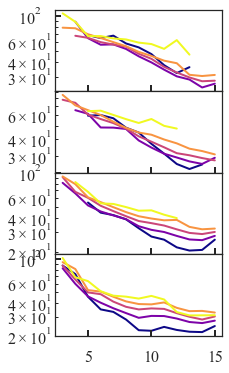

In [258]:
Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
zbins = [0.,0.4,0.8,1.2,1.6]
age_bins=np.linspace(0.,12.,6)
age_centroids=.5*(age_bins[1:]+age_bins[:-1])
scalarMap = get_scalarMap(age_centroids)
f,a=plt.subplots(len(zbins)-1,1,figsize=[3.,6.])
plt.subplots_adjust(wspace=0.,hspace=0.)
for z in range(len(zbins)-1):
    for ad,au in zip(age_bins[:-1],age_bins[1:]):
        dd = gg[(np.abs(gg['z'])>zbins[z])&(np.abs(gg['z'])<zbins[z+1])]
#         dd=(gg['R']>Rbins[r])&(gg['R']<Rbins[r+1])]
        dd = dd[(dd['age']>ad)&(dd['age']<au)&(dd.Z>-1.)]
        plt.sca(a[len(zbins)-2-z])
        cnt = np.array([len(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values) for r in range(len(Rbins)-1)])
        err = np.array([mini(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                    dd['vR_err'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                    sigma_clip(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values).clipped.std()) 
               for r in range(len(Rbins)-1)])
#         err = [np.nanstd(dd['vR'][(gg['R']>Rbins[r])&(gg['R']<Rbins[r+1])]) for r in range(len(Rbins)-1)]
        plt.plot(Rcentroids[cnt>30],err[cnt>30],color=scalarMap.to_rgba(.5*(ad+au)))
        plt.semilogy()
#         plot_distributions(dd,a[len(zbins)-2-z][r],
#                            compt='vR',range=[-150,150.],label=len(dd))
#         a[z][r].set_yticklabels([])
#         a[z][r].set_xticklabels([])
# a[-1][(len(Rbins)-1)/2].set_xlabel(r'$v_{%s}/\mathrm{km\,s}^{-1}$'%'R')

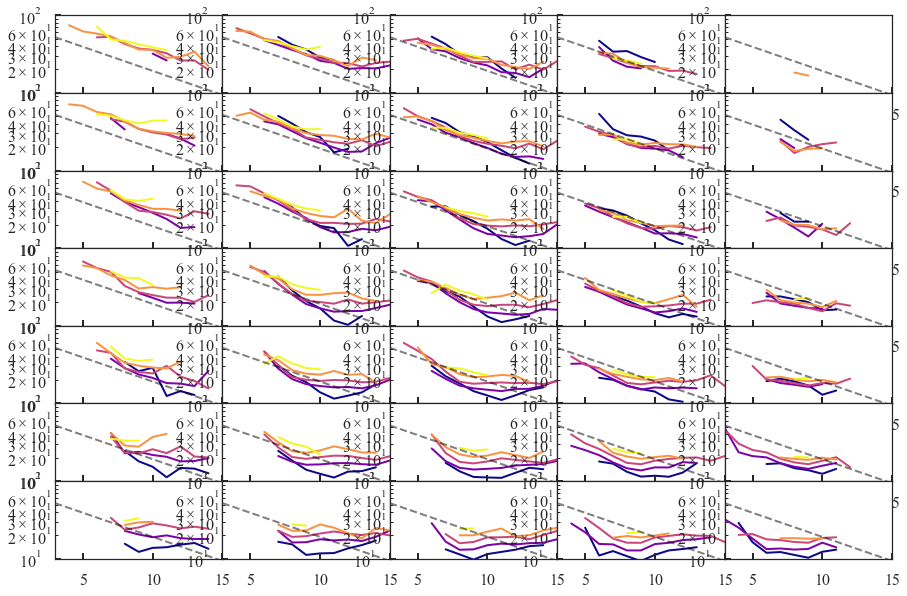

In [286]:
Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
zbins = [0.,0.2,0.4,0.6,0.8,1.,1.2,1.4]
age_bins=np.linspace(0.,12.,6)
age_centroids=.5*(age_bins[1:]+age_bins[:-1])
scalarMap = get_scalarMap(age_centroids)
Zbins = [-0.75,-0.5,-0.25,0.,0.25,0.5]
f,a=plt.subplots(len(zbins)-1,len(Zbins)-1,figsize=[15.,10.])
plt.subplots_adjust(wspace=0.,hspace=0.)

for z in range(len(zbins)-1):
    for Z in range(len(Zbins)-1):
        plt.sca(a[len(zbins)-2-z][Z])
        for ad,au in zip(age_bins[:-1],age_bins[1:]):
            dd = gg[(np.abs(gg['z'])>zbins[z])&(np.abs(gg['z'])<zbins[z+1])&
                   (gg['Z']>Zbins[Z])&(gg['Z']<Zbins[Z+1])]
            dd = dd[(dd['age']>ad)&(dd['age']<au)]
            cnt = np.array([len(dd['vz'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values) for r in range(len(Rbins)-1)])
            err = np.array([mini(dd['vz'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                        dd['vz_err'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                        sigma_clip(dd['vz'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values).clipped.std()) 
                   for r in range(len(Rbins)-1)])
            plt.plot(Rcentroids[cnt>40],err[cnt>40],color=scalarMap.to_rgba(.5*(ad+au)))
        plt.gca().set_yticklabels([])
        plt.semilogy()
        plt.ylim(10.,100.)
        plt.xlim(3.,15.)
        xx = np.linspace(3.,15.)
        plt.plot(xx,np.exp(-xx/7.)*80.,ls='dashed',color='k',alpha=0.5)


In [ ]:
Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
zbins = [0.,0.2,0.4,0.6,0.8,1.,1.2,1.4]
age_bins=np.linspace(0.,12.,6)
age_centroids=.5*(age_bins[1:]+age_bins[:-1])
scalarMap = get_scalarMap(age_centroids)
Zbins = [-0.75,-0.5,-0.25,0.,0.25,0.5]
f,a=plt.subplots(len(zbins)-1,len(Zbins)-1,figsize=[15.,10.])
plt.subplots_adjust(wspace=0.,hspace=0.)

for z in range(len(zbins)-1):
    for Z in range(len(Zbins)-1):
        plt.sca(a[len(zbins)-2-z][Z])
        for ad,au in zip(age_bins[:-1],age_bins[1:]):
            dd = gg[(np.abs(gg['z'])>zbins[z])&(np.abs(gg['z'])<zbins[z+1])&
                   (gg['Z']>Zbins[Z])&(gg['Z']<Zbins[Z+1])]
            dd = dd[(dd['age']>ad)&(dd['age']<au)]
            cnt = np.array([len(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values) for r in range(len(Rbins)-1)])
            err = np.array([mini(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                        dd['vR_err'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                        sigma_clip(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values).clipped.std()) 
                   for r in range(len(Rbins)-1)])
            plt.plot(Rcentroids[cnt>20],err[cnt>20],color=scalarMap.to_rgba(.5*(ad+au)))
        plt.semilogy()
        plt.ylim(10.,100.)
        plt.xlim(3.,15.)
        xx = np.linspace(3.,15.)
        plt.plot(xx,np.exp(-xx/7.)*80.,ls='dashed',color='k',alpha=0.5)
        plt.gca().set_yticklabels([])

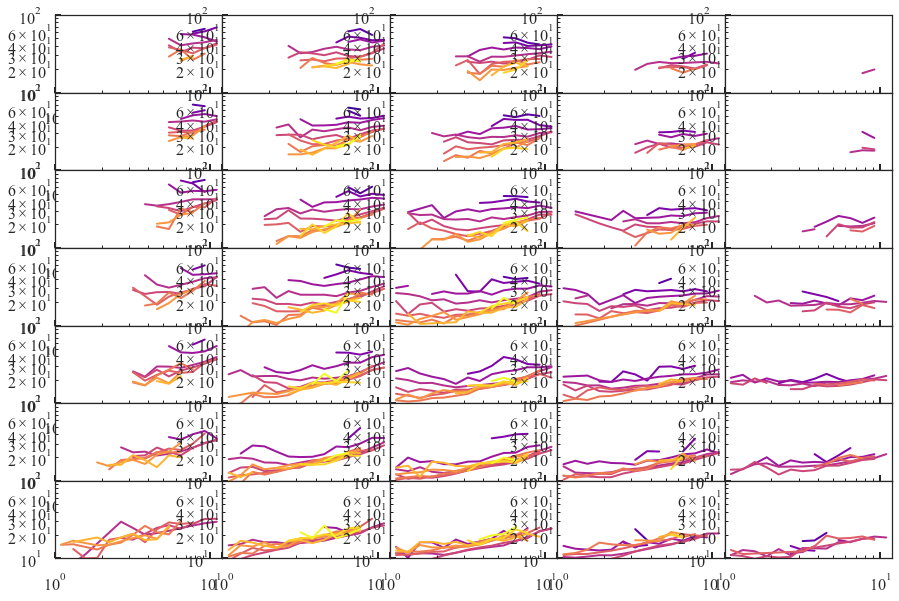

In [309]:
Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
zbins = [0.,0.2,0.4,0.6,0.8,1.,1.2,1.4]
age_bins=np.logspace(np.log10(1.),np.log10(12.),15)
age_centroids=.5*(age_bins[1:]+age_bins[:-1])
scalarMap = get_scalarMap(Rcentroids)
Zbins = [-0.75,-0.5,-0.25,0.,0.25,0.5]
f,a=plt.subplots(len(zbins)-1,len(Zbins)-1,figsize=[15.,10.])
plt.subplots_adjust(wspace=0.,hspace=0.)

for z in range(len(zbins)-1):
    for Z in range(len(Zbins)-1):
        plt.sca(a[len(zbins)-2-z][Z])
        for r in range(len(Rbins)-1):
            dd = gg[(np.abs(gg['z'])>zbins[z])&(np.abs(gg['z'])<zbins[z+1])&
                   (gg['Z']>Zbins[Z])&(gg['Z']<Zbins[Z+1])]
            dd = dd[(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])]
            cnt = np.array([len(dd['vz'][(dd['age']>ad)&(dd['age']<au)].values) for ad,au in zip(age_bins[:-1],age_bins[1:])])
            err = np.array([mini(dd['vz'][(dd['age']>ad)&(dd['age']<au)].values,
                        dd['vz_err'][(dd['age']>ad)&(dd['age']<au)].values,
                        sigma_clip(dd['vz'][(dd['age']>ad)&(dd['age']<au)].values).clipped.std()) 
                   for ad,au in zip(age_bins[:-1],age_bins[1:])])
            plt.plot(age_centroids[cnt>40],err[cnt>40],color=scalarMap.to_rgba(.5*(Rbins[r]+Rbins[r+1])))
        plt.gca().set_yticklabels([])
        plt.semilogy()
        plt.semilogx()
        plt.ylim(10.,100.)
        plt.xlim(1.,12.)
#         xx = np.linspace(0.,12.)
#         plt.plot(xx,np.exp(-xx/7.)*80.,ls='dashed',color='k',alpha=0.5)


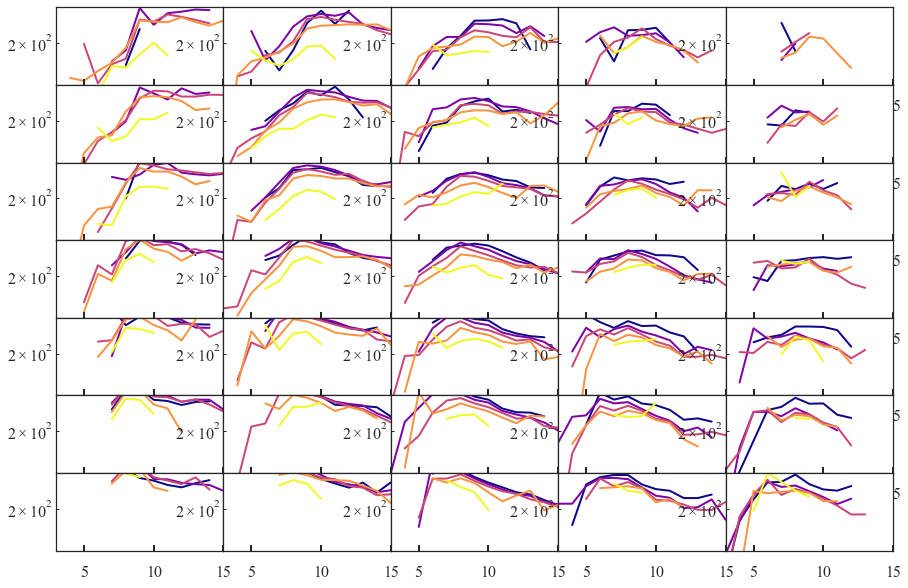

In [312]:
Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
zbins = [0.,0.2,0.4,0.6,0.8,1.,1.2,1.4]
age_bins=np.linspace(0.,12.,6)
age_centroids=.5*(age_bins[1:]+age_bins[:-1])
scalarMap = get_scalarMap(age_centroids)
Zbins = [-0.75,-0.5,-0.25,0.,0.25,0.5]
f,a=plt.subplots(len(zbins)-1,len(Zbins)-1,figsize=[15.,10.])
plt.subplots_adjust(wspace=0.,hspace=0.)

for z in range(len(zbins)-1):
    for Z in range(len(Zbins)-1):
        plt.sca(a[len(zbins)-2-z][Z])
        for ad,au in zip(age_bins[:-1],age_bins[1:]):
            dd = gg[(np.abs(gg['z'])>zbins[z])&(np.abs(gg['z'])<zbins[z+1])&
                   (gg['Z']>Zbins[Z])&(gg['Z']<Zbins[Z+1])]
            dd = dd[(dd['age']>ad)&(dd['age']<au)]
            cnt = np.array([len(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values) for r in range(len(Rbins)-1)])
            err = np.array([np.nanmedian(dd['vphi'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values) 
                   for r in range(len(Rbins)-1)])
            plt.plot(Rcentroids[cnt>20],err[cnt>20],color=scalarMap.to_rgba(.5*(ad+au)))
        plt.semilogy()
        plt.ylim(170.,230.)
        plt.xlim(3.,15.)
        xx = np.linspace(3.,15.)
#         plt.plot(xx,np.exp(-xx/7.)*80.,ls='dashed',color='k',alpha=0.5)
        plt.gca().set_yticklabels([])

In [313]:
from plotting_general import running_median

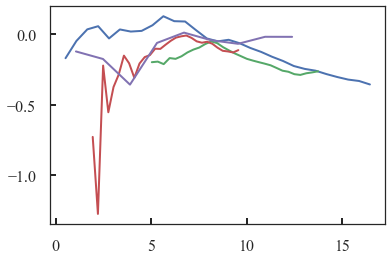

In [353]:
r = running_median(gg.R[(gg.survey=='APOGEE')&(np.abs(gg.z)<1.3)],
                   gg.Z[(gg.survey=='APOGEE')&(np.abs(gg.z)<1.3)],percentiles=[0.01,99.],nbins=30)
plt.plot(r[0],r[1])
r = running_median(gg.R[(gg.survey=='LAMOST')&(np.abs(gg.z)<1.3)],
                   gg.Z[(gg.survey=='LAMOST')&(np.abs(gg.z)<1.3)],percentiles=[0.01,99.],nbins=30)
plt.plot(r[0],r[1])
r = running_median(gg.R[(gg.survey=='GALAH')&(np.abs(gg.z)<1.3)],
                   gg.Z[(gg.survey=='GALAH')&(np.abs(gg.z)<1.3)],percentiles=[0.01,99.],nbins=30)
plt.plot(r[0],r[1])
r = running_median(gg.R[(gg.survey=='GES')&(np.abs(gg.z)<1.3)],
                   gg.Z[(gg.survey=='GES')&(np.abs(gg.z)<1.3)],percentiles=[0.1,99.],nbins=10)
plt.plot(r[0],r[1])

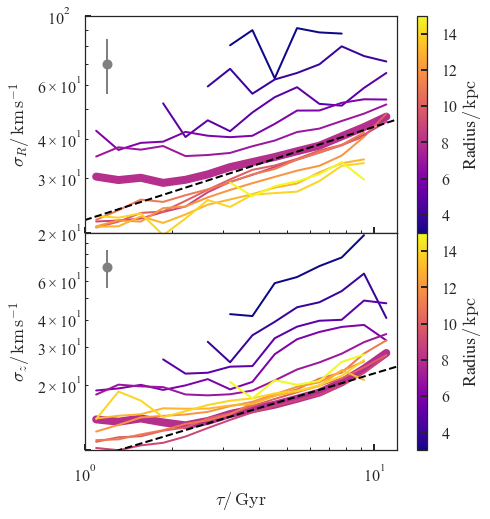

In [501]:

fig,ax = plt.subplots(2,1,figsize=[7.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(ax[0])

Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
scalarMap = get_scalarMap(Rcentroids)
for r in range(len(Rbins)-1):
    dd = gg[(gg['R']>Rbins[r])&(gg['R']<Rbins[r+1])&(np.abs(gg['z'])<0.6)&(gg['Z']>-1.)]
    cnt = np.array([len(dd['vR'][(dd['age']>ad)&(dd['age']<au)].values) for ad,au in zip(age_bins[:-1],age_bins[1:])])
    err = np.array([mini(dd['vR'][(dd['age']>ad)&(dd['age']<au)].values,
                dd['vR_err'][(dd['age']>ad)&(dd['age']<au)].values,
                sigma_clip(dd['vR'][(dd['age']>ad)&(dd['age']<au)].values).clipped.std()) 
           for ad,au in zip(age_bins[:-1],age_bins[1:])])
    lw = 2
    if .5*(Rbins[r]+Rbins[r+1])==8.:
        lw=8
    plt.plot(age_centroids[cnt>50],err[cnt>50],color=scalarMap.to_rgba(.5*(Rbins[r]+Rbins[r+1])),lw=lw)

plt.semilogy()
plt.semilogx()
plt.ylim(20.,100.)
plt.xlim(1.,12.)
xx = np.linspace(1.,12.)
plt.plot(xx,22.*xx**0.3,color='k',ls='dashed')
plt.colorbar(scalarMap,label='Radius$ /\,\mathrm{kpc}$')
plt.xlabel(r'$\tau/\,\mathrm{Gyr}$')
plt.ylabel(r'$\sigma_R/\,\mathrm{km\,s}^{-1}$')
plt.errorbar([1.2],[70.],yerr=[70.*np.sqrt(2./50.)],color='gray',fmt='o',ms=10)
plt.gca().set_xticklabels([])
plt.sca(ax[1])

Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
scalarMap = get_scalarMap(Rcentroids)
for r in range(len(Rbins)-1):
    dd = gg[(gg['R']>Rbins[r])&(gg['R']<Rbins[r+1])&(np.abs(gg['z'])<0.6)&(gg['Z']>-1.)]
    cnt = np.array([len(dd['vz'][(dd['age']>ad)&(dd['age']<au)].values) for ad,au in zip(age_bins[:-1],age_bins[1:])])
    err = np.array([mini(dd['vz'][(dd['age']>ad)&(dd['age']<au)].values,
                dd['vz_err'][(dd['age']>ad)&(dd['age']<au)].values,
                sigma_clip(dd['vz'][(dd['age']>ad)&(dd['age']<au)].values).clipped.std()) 
           for ad,au in zip(age_bins[:-1],age_bins[1:])])
    lw = 2
    if .5*(Rbins[r]+Rbins[r+1])==8.:
        lw=8
    plt.plot(age_centroids[cnt>50],err[cnt>50],color=scalarMap.to_rgba(.5*(Rbins[r]+Rbins[r+1])),lw=lw)
plt.gca().set_yticklabels([])
plt.semilogy()
plt.semilogx()
plt.ylim(10.,100.)
plt.xlim(1.,12.)
xx = np.linspace(1.,12.)
plt.plot(xx,9.*xx**0.4,color='k',ls='dashed')
plt.gca().set_yticklabels(plt.gca().get_yticklabels()[:-2])
plt.colorbar(scalarMap,label='Radius$ /\,\mathrm{kpc}$')
plt.xlabel(r'$\tau/\,\mathrm{Gyr}$')
plt.ylabel(r'$\sigma_z/\,\mathrm{km\,s}^{-1}$')

plt.errorbar([1.2],[70.],yerr=[70.*np.sqrt(2./50.)],color='gray',fmt='o',ms=10)

plt.savefig('sigma_age.pdf', bbox_inches='tight')

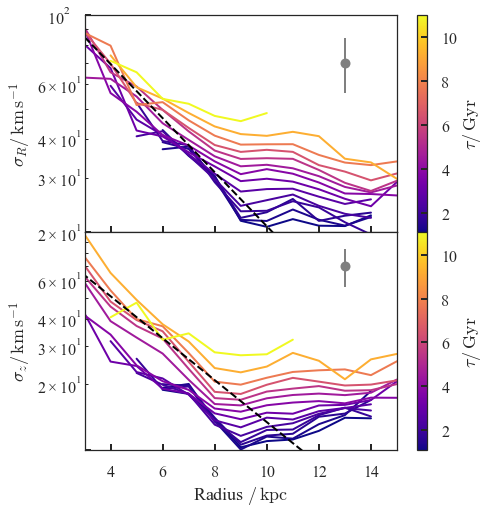

In [503]:

fig,ax = plt.subplots(2,1,figsize=[7.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(ax[0])

Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
scalarMap = get_scalarMap(age_centroids)
for ad,au in zip(age_bins[:-1],age_bins[1:]):
    dd = gg[(gg['age']>ad)&(gg['age']<au)&(np.abs(gg['z'])<0.6)&(gg['Z']>-1.)]
    cnt = np.array([len(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values)
                   for r in range(len(Rbins)-1)])
    err = np.array([mini(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                dd['vR_err'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                sigma_clip(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values).clipped.std()) 
           for r in range(len(Rbins)-1)])
    lw = 2
    plt.plot(Rcentroids[cnt>50],err[cnt>50],color=scalarMap.to_rgba(.5*(au+ad)),lw=lw)
plt.gca().set_xticklabels([])
plt.semilogy()
# plt.semilogx()
plt.ylim(20.,100.)
plt.xlim(3.,15.)
xx = np.linspace(1.,12.)
plt.plot(xx,np.exp(-(xx-8.2)/5.)*30.,color='k',ls='dashed')
plt.colorbar(scalarMap,label=r'$\tau/\,\mathrm{Gyr}$')
# plt.xlabel(r'Radius $/\,\mathrm{kpc}$')
plt.errorbar([13.],[70.],yerr=[70.*np.sqrt(2./50.)],color='gray',fmt='o',ms=10)
plt.ylabel(r'$\sigma_R/\,\mathrm{km\,s}^{-1}$')
plt.sca(ax[1])

Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
scalarMap = get_scalarMap(age_centroids)
for ad,au in zip(age_bins[:-1],age_bins[1:]):
    dd = gg[(gg['age']>ad)&(gg['age']<au)&(np.abs(gg['z'])<0.6)&(gg['Z']>-1.)]
    cnt = np.array([len(dd['vz'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values)
                   for r in range(len(Rbins)-1)])
    err = np.array([mini(dd['vz'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                dd['vz_err'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                sigma_clip(dd['vz'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values).clipped.std()) 
           for r in range(len(Rbins)-1)])
    lw = 2
    plt.plot(Rcentroids[cnt>50],err[cnt>50],color=scalarMap.to_rgba(.5*(au+ad)),lw=lw)
plt.gca().set_yticklabels([])
plt.semilogy()
# plt.semilogx()
plt.ylim(10.,100.)
plt.xlim(3.,15.)
xx = np.linspace(1.,12.)
plt.plot(xx,np.exp(-(xx-8.2)/4.5)*20.,color='k',ls='dashed')
plt.colorbar(scalarMap,label=r'$\tau/\,\mathrm{Gyr}$')
plt.gca().set_yticklabels(plt.gca().get_yticklabels()[:-2])
plt.xlabel(r'Radius $/\,\mathrm{kpc}$')
plt.ylabel(r'$\sigma_z/\,\mathrm{km\,s}^{-1}$')
plt.errorbar([13.],[70.],yerr=[70.*np.sqrt(2./50.)],color='gray',fmt='o',ms=10)
plt.savefig('sigma_radius.pdf',bbox_inches='tight')